<a href="https://colab.research.google.com/github/ArjavMehta01/Truist-Credit_Risk_SAS/blob/Nishang/DEL_Sub_prime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdate

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
de = pd.read_csv('/content/drive/My Drive/summer project/Copy of train_DEL.csv')
#de['Act_date']= pd.to_datetime(de['Act_date'],format= '%m/%d/%y') 
de

,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Act_date,Curr_rte,Act_upb,Loan_age,Next_stat,GDP,HS,UMP,PPI,HPI,yqtr
0,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,06/01/15,4.500,105986.13,73,DEL,18219.405,1205,5.3,194.8,171.467,2015Q2
1,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,09/01/15,4.500,105367.28,76,DEL,18344.713,1224,5.0,189.1,173.847,2015Q3
2,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,12/01/15,4.500,104950.84,79,DEL,18350.825,1146,5.0,183.5,176.598,2015Q4
3,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,10/01/10,6.375,87610.83,22,CUR,15240.843,543,9.4,186.6,142.526,2010Q4
4,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,04/01/11,6.375,87031.41,28,CUR,15496.189,554,9.1,203.1,140.006,2011Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11756,998908346394,133000,02/01/06,89,55.0,688,N,C,SF,1,P,09/01/07,6.125,123856.29,19,CUR,14535.003,1183,4.7,173.5,177.567,2007Q3
11757,999238630268,166000,10/01/08,95,42.0,682,Y,P,SF,1,P,12/01/09,6.750,164576.59,13,SDQ,14628.021,581,9.9,178.1,147.935,2009Q4
11758,999557110284,75000,04/01/11,41,41.0,758,N,C,SF,1,P,06/01/13,4.875,69524.67,25,CUR,16637.926,839,7.5,204.3,154.202,2013Q2
11759,999955193848,264000,04/01/07,80,37.0,660,N,C,SF,1,P,12/01/09,5.875,254300.44,31,CUR,14628.021,581,9.9,178.1,147.935,2009Q4


In [ ]:
def flag(state):
  if state == 'PPY':
    return '-1'
  elif state == 'CUR':
    return '0'
  elif state == 'DEL':
    return '1'
  else:
    return '2'

de['flag'] = de['Next_stat'].map(flag)

de.head()

,Loan_id,Orig_amt,Orig_dte,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Act_date,Curr_rte,Act_upb,Loan_age,Next_stat,GDP,HS,UMP,PPI,HPI,yqtr,flag
0,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,06/01/15,4.500,105986.13,73,DEL,18219.405,1205,5.3,194.8,171.467,2015Q2,1
1,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,09/01/15,4.500,105367.28,76,DEL,18344.713,1224,5.0,189.1,173.847,2015Q3,1
2,100193915350,119000,04/01/09,71,41.0,789,N,R,SF,1,P,12/01/15,4.500,104950.84,79,DEL,18350.825,1146,5.0,183.5,176.598,2015Q4,1
3,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,10/01/10,6.375,87610.83,22,CUR,15240.843,543,9.4,186.6,142.526,2010Q4,0
4,100413254871,90000,11/01/08,67,47.0,696,N,R,CO,1,P,04/01/11,6.375,87031.41,28,CUR,15496.189,554,9.1,203.1,140.006,2011Q2,0


In [ ]:
de = de.drop(['Loan_id','Orig_dte','Act_date','Next_stat','yqtr'],axis=1)

In [ ]:
prime = de.loc[de['Cscore_b'] >= 670]
sub_prime = de.loc[de['Cscore_b'] < 670]

In [ ]:
def dum(list, dataset):
  for col in list:
      x =pd.get_dummies(dataset[col] ,prefix = col)
      dataset = pd.concat([dataset,x], axis=1)
  return dataset
# plan a : using full Categorical
dumlist = ['Purpose', 'Prop_typ', 'Occ_stat','Fthb_flg','Num_unit']
sub_prime = dum(dumlist,sub_prime)

In [ ]:
# plan b&c: only purpose kept
dumlist = ['Purpose']
sub_prime = dum(dumlist,sub_prime)
sub_prime = sub_prime.drop(['Prop_typ', 'Occ_stat','Fthb_flg','Num_unit'],axis=1)
sub_prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Purpose,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,Purpose_C,Purpose_P,Purpose_R
41,74000,95,35.0,643,P,7.5,64681.54,57,16152.257,757,8.2,199.8,141.027,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
42,74000,95,35.0,643,P,7.5,63506.19,63,16358.863,976,7.9,201.5,145.507,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
43,74000,95,35.0,643,P,7.5,59858.64,78,17104.555,970,6.7,207.0,163.109,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
44,74000,95,35.0,643,P,7.5,50873.10,114,19190.431,1186,4.4,191.5,188.169,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0
58,403000,56,39.0,652,R,4.5,388661.64,27,16637.926,930,7.5,204.1,152.860,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1


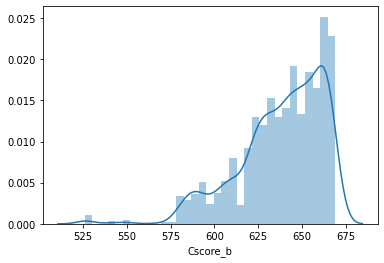

In [ ]:
sns.distplot(sub_prime['Cscore_b'])

In [ ]:
#plan a: group FICO
labels = ["{0} - {1}".format(i, i + 49) for i in range(520, 625, 50)]
sub_prime['FICO_group'] = pd.cut(sub_prime['Cscore_b'], range(520, 675, 50), right=False, labels=labels)
sub_prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,FICO_group
41,74000,95,35.0,643,Y,P,MH,1,P,7.5,64681.54,57,16152.257,757,8.2,199.8,141.027,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669
42,74000,95,35.0,643,Y,P,MH,1,P,7.5,63506.19,63,16358.863,976,7.9,201.5,145.507,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669
43,74000,95,35.0,643,Y,P,MH,1,P,7.5,59858.64,78,17104.555,970,6.7,207.0,163.109,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669
44,74000,95,35.0,643,Y,P,MH,1,P,7.5,50873.10,114,19190.431,1186,4.4,191.5,188.169,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669
58,403000,56,39.0,652,N,R,PU,1,P,4.5,388661.64,27,16637.926,930,7.5,204.1,152.860,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,620 - 669


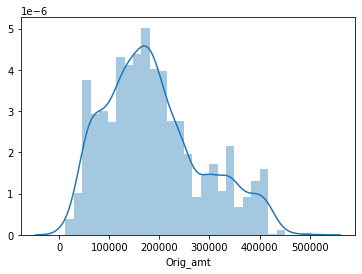

In [ ]:
sns.distplot(sub_prime['Orig_amt'])

In [ ]:
#plan a: group Original UPB
labels = ["{0} - {1}".format(i, i + 99999) for i in range(0, 400001, 100000)]
sub_prime['UPB_group'] = pd.cut(sub_prime['Orig_amt'], range(0, 500001, 100000), right=False, labels=labels)
sub_prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,FICO_group,UPB_group
41,74000,95,35.0,643,Y,P,MH,1,P,7.5,64681.54,57,16152.257,757,8.2,199.8,141.027,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999
42,74000,95,35.0,643,Y,P,MH,1,P,7.5,63506.19,63,16358.863,976,7.9,201.5,145.507,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999
43,74000,95,35.0,643,Y,P,MH,1,P,7.5,59858.64,78,17104.555,970,6.7,207.0,163.109,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999
44,74000,95,35.0,643,Y,P,MH,1,P,7.5,50873.10,114,19190.431,1186,4.4,191.5,188.169,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999
58,403000,56,39.0,652,N,R,PU,1,P,4.5,388661.64,27,16637.926,930,7.5,204.1,152.860,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,620 - 669,400000 - 499999


In [ ]:
# B 
dumlist1 = ['UPB_group']
sub_prime = dum(dumlist1,sub_prime)
sub_prime.head()

In [ ]:
# A
dumlist1 = ['FICO_group', 'UPB_group']
sub_prime = dum(dumlist1,sub_prime)


In [ ]:
sub_prime['ratio_upb'] = sub_prime['Act_upb']/sub_prime['Orig_amt']

In [ ]:
#A
sub_prime = sub_prime.drop(dumlist,axis=1)
sub_prime = sub_prime.drop(dumlist1, axis=1)
sub_prime = sub_prime.drop(['Cscore_b','Orig_amt','Act_upb'],axis=1)
sub_prime.head()

In [ ]:
sub_prime.head()

,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,FICO_group,UPB_group,ratio_upb
41,74000,95,35.0,643,Y,P,MH,1,P,7.5,64681.54,57,16152.257,757,8.2,199.8,141.027,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.874075
42,74000,95,35.0,643,Y,P,MH,1,P,7.5,63506.19,63,16358.863,976,7.9,201.5,145.507,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.858192
43,74000,95,35.0,643,Y,P,MH,1,P,7.5,59858.64,78,17104.555,970,6.7,207.0,163.109,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.808901
44,74000,95,35.0,643,Y,P,MH,1,P,7.5,50873.10,114,19190.431,1186,4.4,191.5,188.169,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.687474
58,403000,56,39.0,652,N,R,PU,1,P,4.5,388661.64,27,16637.926,930,7.5,204.1,152.860,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,620 - 669,400000 - 499999,0.964421


In [ ]:
#A
#standardlized some of the Macro(equal scale & converge problem)

def stdmac(maclist, dataset):
  sampledes = dataset.describe()
  for mac in maclist:
    dataset[mac] = dataset[mac].map(lambda x: (x - sampledes[mac]['mean'])/sampledes[mac]['std'])
  return dataset

macrolist=['GDP','HS','PPI','HPI']
sub_prime = stdmac(macrolist, sub_prime)

In [ ]:

macrolist=['Orig_amt']
sub_prime = stdmac(macrolist, sub_prime)
sub_prime.head()


,Orig_amt,Oltv,Dti,Cscore_b,Fthb_flg,Purpose,Prop_typ,Num_unit,Occ_stat,Curr_rte,Act_upb,Loan_age,GDP,HS,UMP,PPI,HPI,flag,Purpose_C,Purpose_P,Purpose_R,Prop_typ_CO,Prop_typ_CP,Prop_typ_MH,Prop_typ_PU,Prop_typ_SF,Occ_stat_I,Occ_stat_P,Occ_stat_S,Fthb_flg_N,Fthb_flg_Y,Num_unit_1,Num_unit_2,Num_unit_3,Num_unit_4,FICO_group,UPB_group,ratio_upb
41,-1.177269,95,35.0,643,Y,P,MH,1,P,7.5,64681.54,57,-0.257667,-0.464630,8.2,0.661977,-1.012292,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.874075
42,-1.177269,95,35.0,643,Y,P,MH,1,P,7.5,63506.19,63,-0.157660,0.334142,7.9,0.808413,-0.797582,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.858192
43,-1.177269,95,35.0,643,Y,P,MH,1,P,7.5,59858.64,78,0.203293,0.312258,6.7,1.282174,0.046019,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.808901
44,-1.177269,95,35.0,643,Y,P,MH,1,P,7.5,50873.10,114,1.212963,1.100089,4.4,-0.052972,1.247056,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,620 - 669,0 - 99999,0.687474
58,2.209035,56,39.0,652,N,R,PU,1,P,4.5,388661.64,27,-0.022579,0.166364,7.5,1.032373,-0.445179,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,620 - 669,400000 - 499999,0.964421


In [62]:
##C-2
#Logistic Regression simple
sampleNext = sub_prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Oltv','Dti', 'Loan_age','GDP','Purpose_C','Purpose_P','Purpose_R','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.952384
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 3211
Model:                        MNLogit   Df Residuals:                     3187
Method:                           MLE   Df Model:                           21
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.01689
Time:                        04:52:25   Log-Likelihood:                -3058.1
converged:                       True   LL-Null:                       -3110.6
Covariance Type:            nonrobust   LLR p-value:                 3.640e-13
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Oltv           0.0085      0.009      0.910      0.363      -0.010       0.027
Dti           -0.0082      0.

In [ ]:
##C
#Logistic Regression simple
sampleNext = sub_prime.dropna()
dy = sampleNext['flag']
dx = sampleNext[['Orig_amt','Oltv','Dti','Cscore_b','Curr_rte', 'Loan_age','GDP','HS','UMP','PPI','HPI','Purpose_C','Purpose_P','Purpose_R','ratio_upb']]
import statsmodels.api as st
mdl = st.MNLogit(dy, dx)
mdl_fit = mdl.fit()
print (mdl_fit.summary())

Optimization terminated successfully.
         Current function value: 0.942171
         Iterations 8
                          MNLogit Regression Results                          
Dep. Variable:                   flag   No. Observations:                 3211
Model:                        MNLogit   Df Residuals:                     3166
Method:                           MLE   Df Model:                           42
Date:                Sun, 28 Jun 2020   Pseudo R-squ.:                 0.02743
Time:                        04:26:51   Log-Likelihood:                -3025.3
converged:                       True   LL-Null:                       -3110.6
Covariance Type:            nonrobust   LLR p-value:                 1.967e-17
    flag=0       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Orig_amt      -0.0191      0.138     -0.138      0.890      -0.291       0.252
Oltv           0.0082      0.